In [69]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [5]:
train = pd.read_csv("/home/neko/UCI HAR Dataset/f_train.csv")
test = pd.read_csv("/home/neko/UCI HAR Dataset/f_test.csv")

In [11]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,label,activity
0,0.29,-0.02,-0.13,-1.00,-0.98,-0.91,-1.00,-0.98,-0.92,-0.93,...,-0.11,0.03,-0.46,-0.02,-0.84,0.18,-0.06,1,5,STANDING
1,0.28,-0.02,-0.12,-1.00,-0.98,-0.96,-1.00,-0.97,-0.96,-0.94,...,0.05,-0.01,-0.73,0.70,-0.84,0.18,-0.05,1,5,STANDING
2,0.28,-0.02,-0.11,-1.00,-0.97,-0.98,-1.00,-0.96,-0.98,-0.94,...,-0.12,0.18,0.10,0.81,-0.85,0.18,-0.05,1,5,STANDING


In [21]:
X_train = train.drop(['subject', 'label', 'activity'], axis=1)
y_train = train.label
test_X= test.drop(['subject', 'label', 'activity'], axis=1)
test_y = test.label
X_test, X_val, y_test, y_val = train_test_split(test_X, test_y, test_size=0.2,random_state =123)


I further divide the test set into validation dataset and test dataset, to get our model to predict unseen dataset later 

- I'm using this  library called Lazy Predict to make a rough classification on few different models 
- This will help on choosing which model perform best on our current dataset 
- The library can be found from this link https://github.com/shankarpandala/lazypredict

In [24]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [01:49<00:00,  3.77s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
CalibratedClassifierCV             0.97               0.97    None      0.97   
LinearSVC                          0.97               0.96    None      0.97   
PassiveAggressiveClassifier        0.96               0.96    None      0.96   
LogisticRegression                 0.95               0.95    None      0.95   
Perceptron                         0.95               0.95    None      0.95   
SVC                                0.95               0.95    None      0.95   
RidgeClassifier                    0.94               0.94    None      0.94   
ExtraTreesClassifier               0.94               0.94    None      0.94   
SGDClassifier                      0.93               0.93    None      0.93   
LGBMClassifier                     0.93               0.93    None      0.93   
RandomForestClassifier             0.92 

In [27]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
CalibratedClassifierCV,0.97,0.97,None,0.97,12.06
LinearSVC,0.97,0.96,None,0.97,3.25
PassiveAggressiveClassifier,0.96,0.96,None,0.96,0.96
LogisticRegression,0.95,0.95,None,0.95,1.18
Perceptron,0.95,0.95,None,0.95,0.68
SVC,0.95,0.95,None,0.95,2.95
RidgeClassifier,0.94,0.94,None,0.94,0.18
ExtraTreesClassifier,0.94,0.94,None,0.94,1.54
SGDClassifier,0.93,0.93,None,0.93,1.05


As we can see, the highest scored models with 97% accuracy are CalibratedClassifierCV and LinearSVC. In this case I will choose LinearSVC as the time taken for the model to converge is shorter than the other one

### Train using LinearSVC

In [68]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import numpy as np
plt.rcParams["font.family"] = 'DejaVu Sans'

In [57]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC()


In [33]:
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

Score:  0.9949673558215452


The train prediction achieve 99% of accuracy

In [34]:
cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.95


To make sure it is not overfitting, we try to do cross validation on the dataset, and it obtain average score of 95% 

--------------------
| Confusion Matrix |
--------------------

 [[383   0   5   0   0   0]
 [ 17 362   1   0   0   0]
 [  2   2 329   0   0   0]
 [  0   3   0 349  42   2]
 [  1   0   0   7 428   0]
 [  0   0   0   0   0 424]]


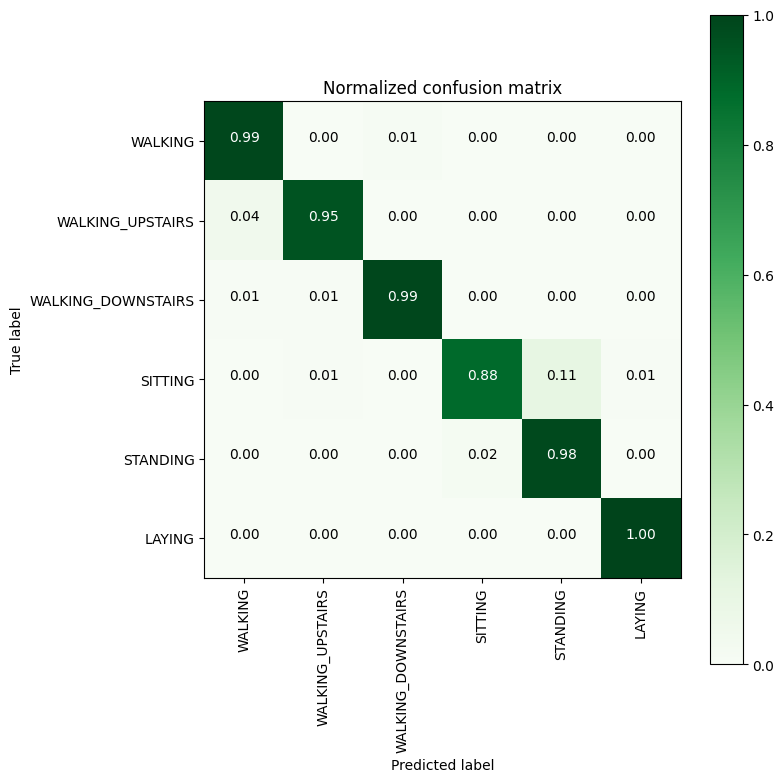

In [63]:
labels = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

y_pred = lsvc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Greens)
plt.show()

The graph above depicts the confusion matrix on the test dataset 

print out the  classification report

In [66]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       388
           2       0.99      0.95      0.97       380
           3       0.98      0.99      0.99       333
           4       0.98      0.88      0.93       396
           5       0.91      0.98      0.94       436
           6       1.00      1.00      1.00       424

    accuracy                           0.97      2357
   macro avg       0.97      0.97      0.97      2357
weighted avg       0.97      0.97      0.97      2357



### Validation

--------------------
| Confusion Matrix |
--------------------

 [[112   0   0   0   0   0]
 [  0  87   0   0   0   0]
 [  0   0  87   0   0   0]
 [  0   0   0  86   0   0]
 [  0   0   0   0 105   0]
 [  0   0   0   0   0 113]]


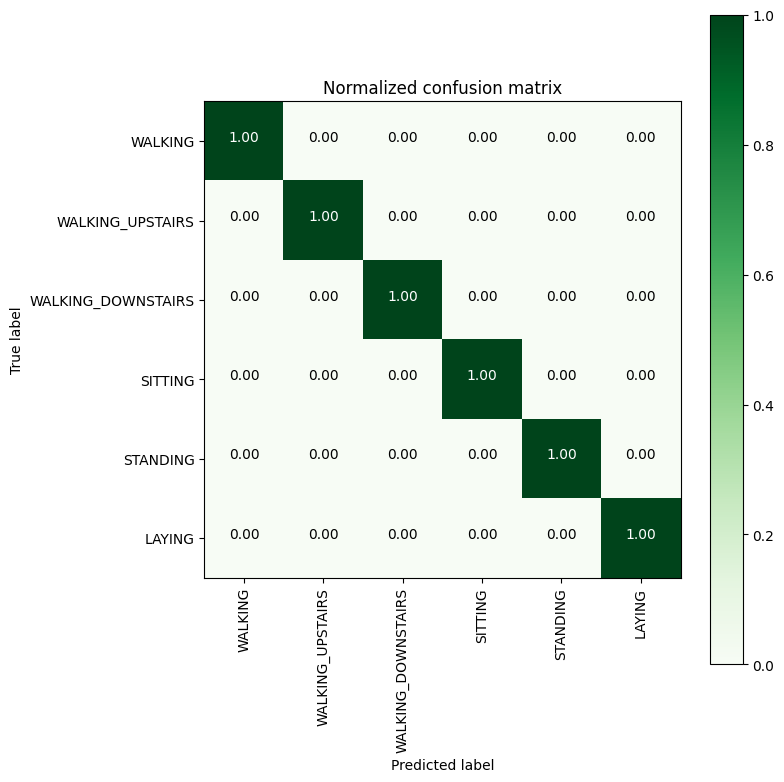

In [64]:
y_pred_val= lsvc.predict(X_val)

cm = confusion_matrix(y_val, y_pred_val)
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
        
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Greens)
plt.show()

Lastly, we try on validation dataset 